In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from datetime import datetime

In [2]:
with open("logins.json") as json_file:
    login_data=json.load(json_file)

login_time_norm =json_normalize(login_data, 'login_time')
login_time_norm.columns = ['timeStamp']
login_time_norm['timeStamp'] = pd.to_datetime(login_time_norm['timeStamp'], format= '%Y/%m/%d %H:%M:%S')
login_time_norm

,timeStamp
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [8]:
login_time_norm['n'] =np.arange(len(login_time_norm))
login_time_norm

,n
timeStamp,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4
...,...
1970-04-13 18:50:19,93137
1970-04-13 18:43:56,93138
1970-04-13 18:54:02,93139


In [4]:
login_time_norm= login_time_norm.set_index('timeStamp')
login_time_norm

,n
timeStamp,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4
...,...
1970-04-13 18:50:19,93137
1970-04-13 18:43:56,93138
1970-04-13 18:54:02,93139


In [5]:
login_15mins=login_time_norm.n.resample('15Min').count()
login_15mins

timeStamp
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: n, Length: 9788, dtype: int64

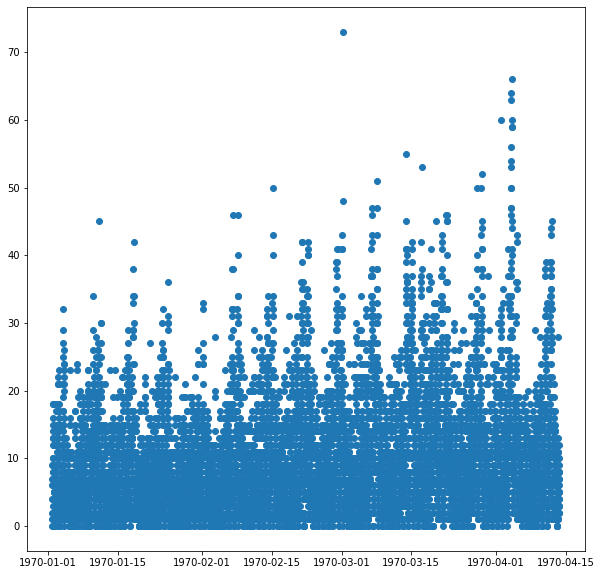

In [9]:
plt.plot_date(login_15mins.index, login_15mins)
plt.rcParams['figure.figsize'] = (10,10)

In [7]:
login_15mins.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: n, dtype: float64

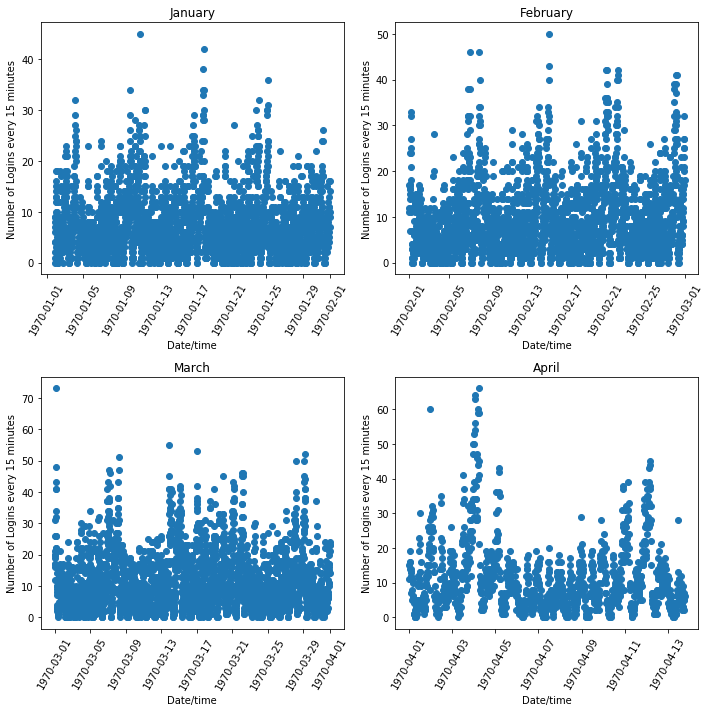

In [26]:
login_15mins_Jan=login_15mins['1970-01-01':'1970-01-31']
login_15mins_Feb=login_15mins['1970-02-01':'1970-02-28']
login_15mins_Mar=login_15mins['1970-03-01':'1970-03-31']
login_15mins_Apr=login_15mins['1970-04-01':'1970-04-15']

plt.subplot(2, 2, 1)
plt.plot_date(login_15mins_Jan.index, login_15mins_Jan)
plt.title('January')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)

plt.subplot(2, 2, 2)
plt.plot_date(login_15mins_Feb.index, login_15mins_Feb)
plt.title('February')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)

plt.subplot(2, 2, 3)
plt.plot_date(login_15mins_Mar.index, login_15mins_Mar)
plt.title('March')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)

plt.subplot(2, 2, 4)
plt.plot_date(login_15mins_Apr.index, login_15mins_Apr)
plt.title('April')
plt.ylabel('Number of Logins every 15 minutes')
plt.xlabel('Date/time')
plt.xticks(rotation=60)

plt.tight_layout()